In this notebook we will use RNNs to train a network that is able to predict values of the stock price in future.

First we need to get real data from yahoo finance: https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1277769600&period2=1611446400&interval=1d&events=history&includeAdjustedClose=true 

Place the downloaded TSLA.csv file next to the notebook.

We will need the following libraries to build and train the network. We will use keras of tensorflow 2.

In [38]:
import sys
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib 

Make sure we running python3 and tensorflow2.

In [8]:
print(f'Running python {sys.version}')
print(f'Running tensorflow {tf.__version__}')

Running python 3.8.6 (default, Oct 20 2020, 09:50:21) 
[Clang 11.0.3 (clang-1103.0.32.62)]
Running tensorflow 2.4.1


Check if you have GPU, enable it if so to make the training faster.

In [9]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16651565645945265174
]


Let's read and examine the dataset.

In [11]:
tesla_stock = pd.read_csv('TSLA.csv')
tesla_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2656,2021-01-15,852.000000,859.900024,819.099976,826.159973,826.159973,38777600
2657,2021-01-19,837.799988,850.000000,833.000000,844.549988,844.549988,25367000
2658,2021-01-20,858.739990,859.500000,837.280029,850.450012,850.450012,25665900
2659,2021-01-21,855.000000,855.719971,841.419983,844.989990,844.989990,20598100


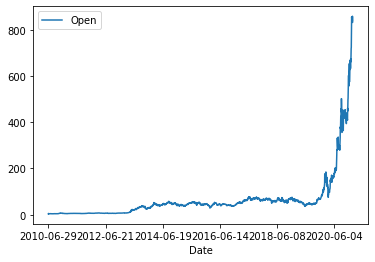

In [23]:
tesla_stock.plot(x='Date',y='Open')

In [30]:
tesla_stock_data = tesla_stock.iloc[1000:, 1:2].values
print(tesla_stock_data)

[[ 45.776001]
 [ 45.703999]
 [ 45.902   ]
 ...
 [858.73999 ]
 [855.      ]
 [834.309998]]


In [31]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range=(0, 1))
tesla_stock_data_scaled = scaler.fit_transform(tesla_stock_data) 

In [32]:
days = np.linspace(1, len(tesla_stock_data), len(tesla_stock_data))

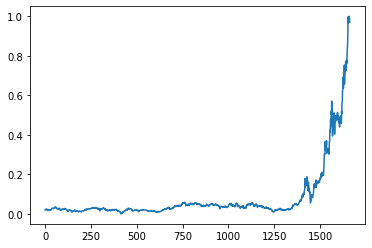

In [33]:
plt.plot(days, tesla_stock_data_scaled)

In [35]:
features = []  
labels = []  
for i in range(0, 950):  
    features.append(tesla_stock_data_scaled[i:i+50, 0])
    labels.append(tesla_stock_data_scaled[i+50, 0])
features=np.array(features)
labels=np.array(labels)

In [36]:
features = np.reshape(features, (features.shape[0], features.shape[1], 1))
features.shape

(950, 50, 1)

In [37]:
labels.shape

(950,)

In [48]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import LSTM  
from tensorflow.keras.layers import Dropout  

In [53]:
model = Sequential()  
model.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1], 1),unroll=False)) 
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50))  
model.add(Dropout(0.2))  
model.add(Dense(units = 1))

In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [55]:
history = model.fit(features, labels, epochs = 50, batch_size = 32)

Epoch 1/50
30/30 [==============================] - 8s 67ms/step - loss: 2.6545e-04
Epoch 2/50
30/30 [==============================] - 2s 62ms/step - loss: 4.9550e-05
Epoch 3/50
30/30 [==============================] - 2s 62ms/step - loss: 3.0883e-05
Epoch 4/50
30/30 [==============================] - 2s 61ms/step - loss: 3.9976e-05
Epoch 5/50
30/30 [==============================] - 2s 60ms/step - loss: 3.2808e-05
Epoch 6/50
30/30 [==============================] - 2s 59ms/step - loss: 3.1148e-05
Epoch 7/50
30/30 [==============================] - 2s 59ms/step - loss: 2.6659e-05
Epoch 8/50
30/30 [==============================] - 2s 66ms/step - loss: 2.5293e-05
Epoch 9/50
30/30 [==============================] - 2s 60ms/step - loss: 2.2253e-05
Epoch 10/50
30/30 [==============================] - 2s 57ms/step - loss: 2.5951e-05
Epoch 11/50
30/30 [==============================] - 2s 56ms/step - loss: 2.4091e-05
Epoch 12/50
30/30 [==============================] - 2s 56ms/step - loss: 

In [56]:
#model.save('tesla_model.h5')
#from tensorflow.keras.models import load_model
#model = load_model('tesla_model.h5')
#history_dict = history.history
#history_dict.keys()

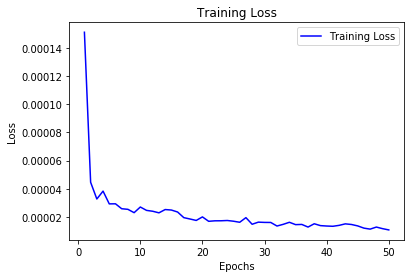

In [64]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
testing = []
for i in range(1250, 1500):  
    testing.append(tesla_stock_data_scaled[i:i+50, 0])
testing = np.array(testing)  
testing = np.reshape(testing, (testing.shape[0], testing.shape[1], 1))  
testing.shape

(250, 50, 1)

In [61]:
predictions = model.predict(testing) 
predictions = scaler.inverse_transform(predictions) 

In [62]:
actual = tesla_stock_data_scaled[1300:1550,0]
actual = actual.reshape(-1,1)
actual = scaler.inverse_transform(actual)

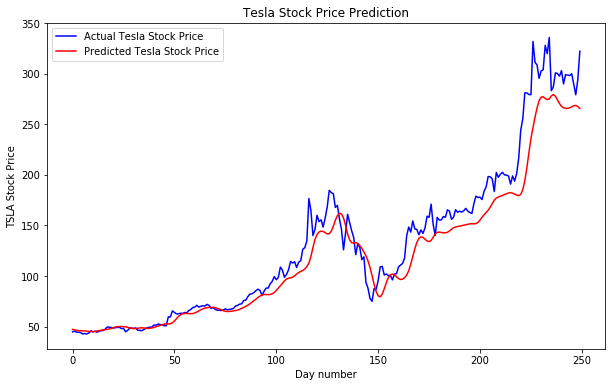

In [63]:
plt.figure(figsize=(10,6))  
plt.plot(actual, color='blue', label='Actual Tesla Stock Price')  
plt.plot(predictions , color='red', label='Predicted Tesla Stock Price')  
plt.title('Tesla Stock Price Prediction')  
plt.xlabel('Day number')  
plt.ylabel('Tesla Stock Price')  
plt.legend()  
plt.show() 